# Александр Андреевич Шаталин

## Рабочая тетрадь 4

### 1.1 Задание

In [192]:
import numpy as np
x = np.array(list(range(4)))
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [193]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

0.9999999999999999 -0.9499999999999994


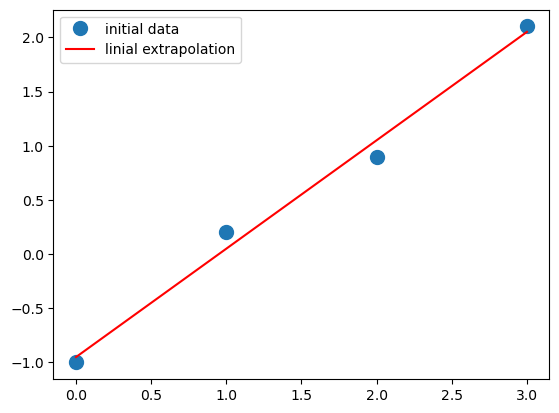

In [194]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='initial data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linial extrapolation')
plt.legend()
plt.show()

In [195]:
from numpy import *
from numpy.random import *

In [196]:
delta = 1.0
x = linspace(-5, 5, 11)
y = x**2 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

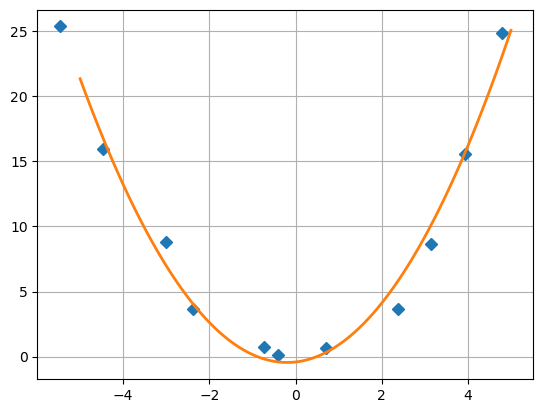

In [197]:
m = vstack((x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**2 + 
    s[1] * x_prec + 
    s[2],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()

In [198]:
delta = 1.0
x = linspace(-5, 5, 11)
y = x**3 + delta * (rand(11)-0.5)
x += delta * (rand(11)-0.5)

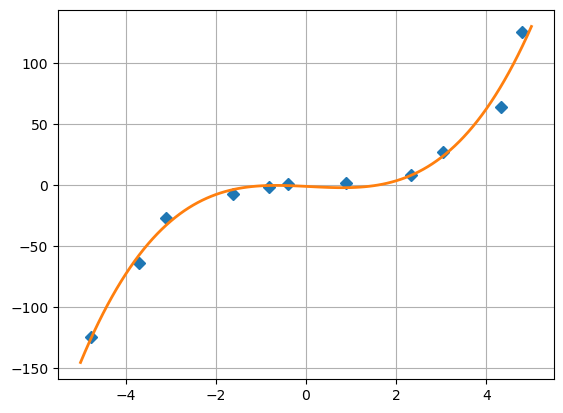

In [199]:
m = vstack((x**3, x**2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**3 + 
    s[1] * x_prec**2 + 
    s[2] * x_prec + 
    s[3],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()

### 1.2 Задание

In [200]:
def linear(x: float, b0: float, b1: float) -> float:
    return b0 + b1 * x
    
def square(x: float, b0: float, b1: float, b2: float) -> float:
    return b0 + b1 * x + b1 * x**2

def logariphmic(x: float, b0: float, b1: float) -> float:
    return b0 + b1*log(x)

def exponential(x: float, b0: float, b1: float) -> float:
    return b0 * x**b1
    
x, b0, b1, b2 = 2, 3, 5, 6

linear(x, b0, b1), square(x, b0, b1, b2), logariphmic(x, b0, b1), exponential(x, b0, b1)

(13, 33, 6.465735902799727, 96)

In [201]:
beta = (0.25, 0.75)

xdata = np.linspace(0, 5, 50)
y = linear(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

In [202]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(linear, xdata, ydata)
beta_opt

array([0.23270214, 0.75550604])

In [203]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - linear(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.0001397794061340276
0.12290947682353329


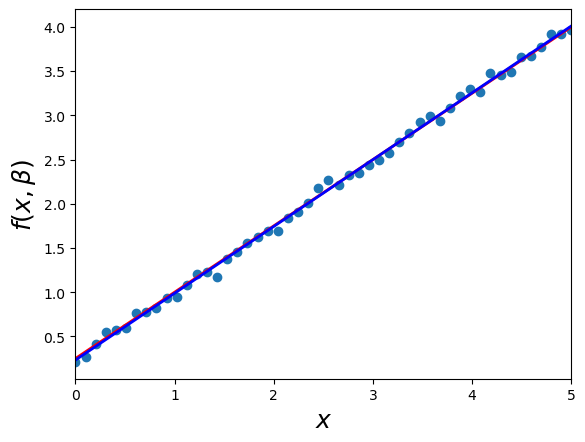

In [204]:
def plot(xdata, ydata, beta_opt, func):
    fig, ax = plt.subplots()
    ax.scatter(xdata, ydata)
    ax.plot(xdata, y, 'r', lw=2)
    ax.plot(xdata, func(xdata, *beta_opt), 'b', lw=2)
    ax.set_xlim(0, 5)
    ax.set_xlabel(r'$x$', fontsize=18)
    ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
    plt.show()

plot(xdata, ydata, beta_opt, linear)

In [205]:
beta = (0.25, 0.75, 0.5)

xdata = np.linspace(0, 5, 50)

y = square(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(square, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - square(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.24438779 0.74975916 1.        ]
inf
0.12952828573633762


/Users/a125x/opt/miniconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


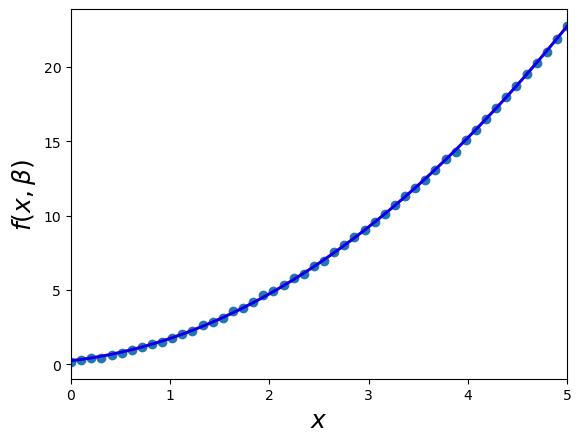

In [206]:
plot(xdata, ydata, beta_opt, square)

In [207]:
beta = (1, 2)

xdata = np.linspace(1, 5, 50)

y = logariphmic(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(logariphmic, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - logariphmic(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[1.01375613 1.97381305]
6.060350206406231e-05
0.14014203751037826


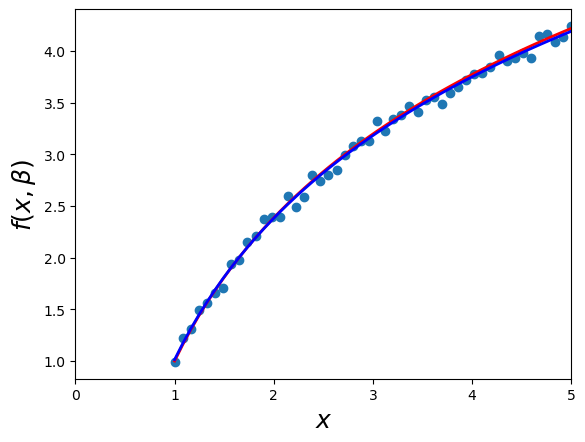

In [208]:
plot(xdata, ydata, beta_opt, logariphmic)

In [209]:
beta = (1, 2)

xdata = np.linspace(1, 5, 50)

y = exponential(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(exponential, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - exponential(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.99907688 2.00045756]
4.313944989027938e-06
0.10294313601303788


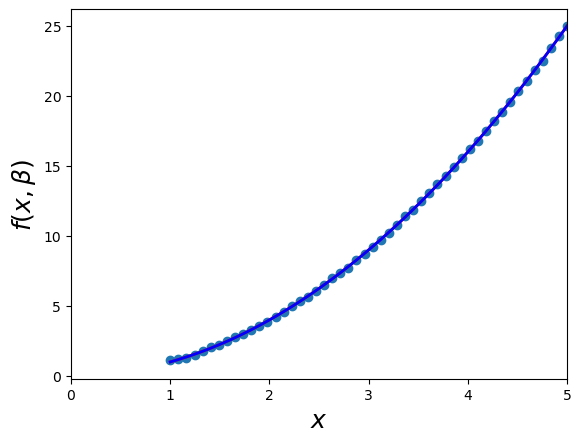

In [210]:
plot(xdata, ydata, beta_opt, exponential)

### 2.1 Задание

In [211]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('Salary_Data.csv', sep=','))
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


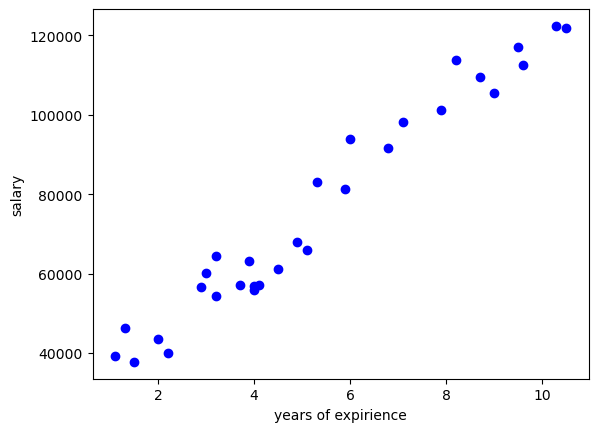

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [212]:
plt.scatter(df['YearsExperience'], df['Salary'], color='b', label='salary data')
plt.xlabel('years of expirience')
plt.ylabel('salary')
plt.show()
print(df.shape)
df.describe()

In [213]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.099150628157
[9312.57512673]


In [214]:
y_pred = regressor.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


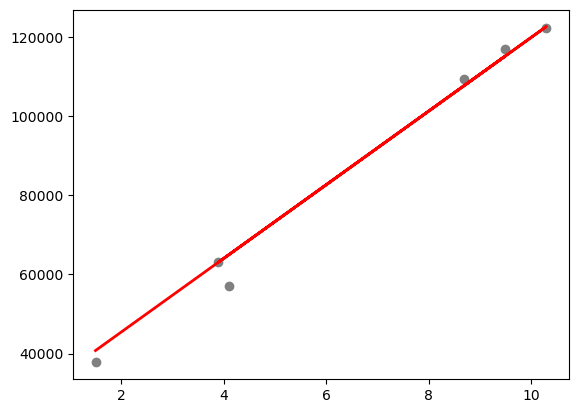

In [215]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### 3.1 Задание

In [216]:
df = pd.DataFrame(pd.read_csv('winequality-red.csv', sep=','))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [217]:
print(df.shape)
df.describe()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [218]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.head(), y.head()

(   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0            7.4              0.70         0.00             1.9      0.076   
 1            7.8              0.88         0.00             2.6      0.098   
 2            7.8              0.76         0.04             2.3      0.092   
 3           11.2              0.28         0.56             1.9      0.075   
 4            7.4              0.70         0.00             1.9      0.076   
 
    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
 0                 11.0                  34.0   0.9978  3.51       0.56   
 1                 25.0                  67.0   0.9968  3.20       0.68   
 2                 15.0                  54.0   0.9970  3.26       0.65   
 3                 17.0                  60.0   0.9980  3.16       0.58   
 4                 11.0                  34.0   0.9978  3.51       0.56   
 
    alcohol  
 0      9.4  
 1      9.8  
 2      9.8  
 3      9.8  
 4

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [220]:
y_pred = regressor.predict(X_test)
print('MSE:', sklearn.metrics.mean_squared_error(y_test, y_pred))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

MSE: 0.384471197820125


,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529
...,...,...
794,6,6.559757
813,4,6.017576
1322,5,6.251291
704,4,5.163926


### 3.2 Задание

Вариант 1

In [221]:
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([3.0, 6.0, 3.0, 6.0, 4.0, 3.0])
x, y

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), array([3., 6., 3., 6., 4., 3.]))

In [222]:
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0. , 1. ],
       [0.2, 1. ],
       [0.4, 1. ],
       [0.6, 1. ],
       [0.8, 1. ],
       [1. , 1. ]])

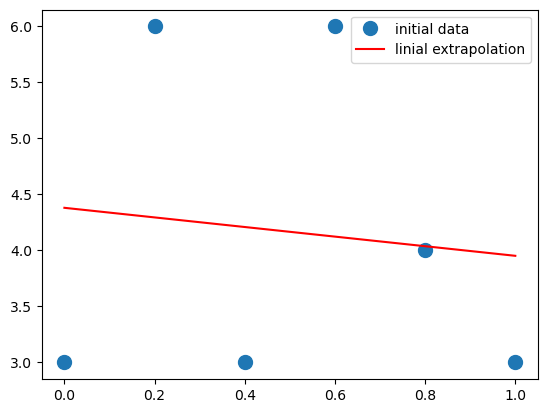

In [223]:
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='initial data', markersize=10)
plt.plot(x, m*x + c, 'r', label='linial extrapolation')
plt.legend()
plt.show()

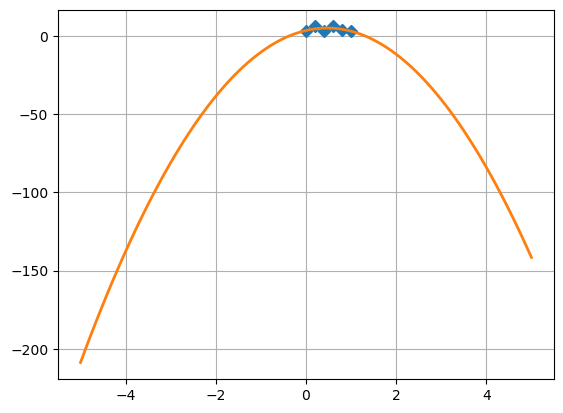

In [224]:
m = vstack((x**2, x, ones(6))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')

plt.plot(
    x_prec, 
    s[0] * x_prec**2 + 
    s[1] * x_prec + 
    s[2],
    '-',
    lw=2
    )
    
plt.grid()
plt.show()